In [42]:
import pandas as pd

df=pd.read_csv("./Test_mpa/VO_annonces_2015-ALL_CR.csv")

/home/wilder/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
# On ne garde pas les variables body_type, color_slug et stk_year car elles ont trop de valeurs manquantes
# Attention, on enlève aussi environ 50 000  lignes à cause des None dans les colonnes door_count et seat_count
import numpy as np


cleaned_data=df.loc[:, ~df.columns.isin(['body_type', 'color_slug','stk_year'])].dropna()
cleaned_data=cleaned_data[(cleaned_data['door_count']!='None')& (cleaned_data['seat_count']!='None')]

In [52]:
cleaned_data.shape

(451660, 13)

In [53]:
# One hot encoding sur les variables transmission et fuel_type

df=pd.get_dummies(cleaned_data, columns=['transmission','fuel_type'])

In [54]:
# Creation target comme étant la différence en jour date_last seen - date_created

df['date_last_seen'] =  pd.to_datetime(df['date_last_seen'], format='%Y-%m-%d %H:%M:%S.%f')
df['date_created'] =  pd.to_datetime(df['date_created'], format='%Y-%m-%d %H:%M:%S.%f')

df['time_sold']=(df['date_last_seen']-df['date_created']).apply(lambda t: t.days)

In [55]:
# On enlève les annonces considérées comme "oubliées"

df=df[df['time_sold']!=60]

In [56]:
# Label encoding pour les variables marque et modèle

from sklearn.preprocessing import LabelEncoder

lb_maker = LabelEncoder()
df["maker"] = lb_maker.fit_transform(df["maker"])
lb_model = LabelEncoder()
df["model"] = lb_model.fit_transform(df["model"])

In [57]:
# Suppression colonnes de date
df=df.drop(['date_created', 'date_last_seen'], axis=1)

In [58]:
df=df.loc[(df[['price_eur']]<2000000)['price_eur']]

In [59]:
df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,door_count,seat_count,price_eur,transmission_auto,transmission_man,fuel_type_cng,fuel_type_diesel,fuel_type_electric,fuel_type_gasoline,fuel_type_lpg,time_sold
0,11,412,151000.0,2011.0,2000.0,103.0,5,7,10584.75,0,1,0,1,0,0,0,74
1,38,585,143476.0,2012.0,2000.0,81.0,5,5,8882.31,0,1,0,1,0,0,0,74
3,38,387,111970.0,2004.0,1200.0,47.0,5,5,2960.77,0,1,0,0,0,1,0,74
4,38,387,128886.0,2004.0,1200.0,47.0,5,5,2738.71,0,1,0,0,0,1,0,74
5,38,387,140932.0,2003.0,1200.0,40.0,5,5,1628.42,0,1,0,0,0,1,0,74


In [60]:
X_data = df.loc[:, ~df.columns.isin(['time_sold'])]
y_data = df['time_sold'].values

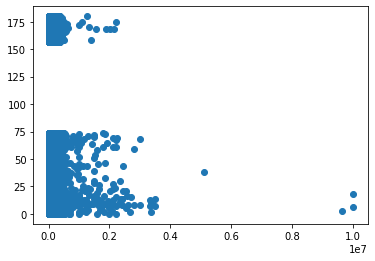

In [65]:
import matplotlib.pyplot as plt
plt.scatter(X_data['mileage'],y_data)

In [26]:
X_data=X_data[X_data['price_eur']<2000000]

In [88]:
# Normalisation des données
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

In [89]:
# découpage d'un jeu de test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42,shuffle=True,stratify=y_data)

Evaluons les performances de 3 régresseurs : régression linéaire, gradient boosting et random forest. On utilise comme métrique d'évaluation root mean square error

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()


scores_lr=cross_val_score(lin_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [46]:
lin_reg_rmse_scores=np.sqrt(-scores_lr)

In [47]:
lin_reg_rmse_scores

array([ 47.246906  ,  47.03025908,  46.95832773, 105.08873704,
        47.00409585])

In [42]:
from sklearn.ensemble import GradientBoostingRegressor


gb_reg = GradientBoostingRegressor(random_state=0)

scores=cross_val_score(gb_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [43]:
gb_rmse_scores=np.sqrt(-scores)

In [44]:
gb_rmse_scores

array([44.92376712, 44.73556664, 44.71476574, 44.71997716, 44.81442163])

In [60]:
from sklearn.model_selection import cross_val_score


rf_reg=RandomForestRegressor(max_depth=10, random_state=0)

scores=cross_val_score(rf_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

/home/wilder/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/wilder/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/wilder/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/wilder/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/wilder/anaconda3/lib/python3.7/site-pa

In [61]:
rf_rmse_scores=np.sqrt(-scores)

In [62]:
rf_rmse_scores

array([44.23348466, 44.09975273, 44.41248456, 44.2101624 , 44.42873994])

On retient RandomForestRegressor comme régresseur

Evaluons ses performances sur le jeu de test

In [79]:
from sklearn.metrics import mean_squared_error


rf_reg=RandomForestRegressor(max_depth=10, random_state=0)
rf_reg.fit(X_train,y_train)
y_pred=rf_reg.predict(X_test)

rf_mse_score=mean_squared_error(y_pred,y_test)
rf_rmse_score=np.sqrt(rf_mse_score)

/home/wilder/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [80]:
rf_rmse_score

44.23901783385179

In [86]:
rf_reg.feature_importances_

array([4.19967248e-02, 3.90105091e-02, 8.47090080e-02, 5.71886952e-02,
       2.89691070e-02, 3.63072956e-02, 1.21826324e-01, 1.15784331e-02,
       5.69970317e-01, 1.04191657e-03, 5.95000800e-04, 1.55858345e-05,
       4.49052113e-03, 0.00000000e+00, 2.29151902e-03, 9.04333823e-06])

La principale variable qui sert pour la prévision est le prix (57%) suivi par le nombre de places (12%) et le nombre de kilomètres au compteur (8.5%)

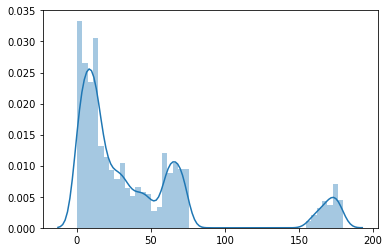

In [81]:
import seaborn as sns
sns.distplot(y_test)

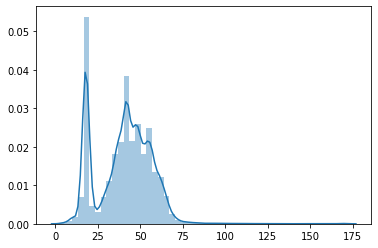

In [82]:
import seaborn as sns
sns.distplot(y_pred)

Le modèle n'arrive pas à prévoir les voitures qui ne sont pas très attractives

Convertissons ces prédictions en score d'attractivité

Pour cela, on va utiliser une translaté-dilaté de tanh, utilisons la fonction x -> tanh(5-x/18), elle vaut 1 en 0 temps de vente minimum), 0 en 90 (tps de vente moyen) et -1 en 180 (tps de vente max) et est donc tout à fait adaptée pour construire les scores d'attractivité

In [68]:
def score_attractivite(x):
    return np.tanh(5-x/18)

In [72]:
score_attractivite(y_pred)

array([0.96364231, 0.99596015, 0.9993277 , ..., 0.99955066, 0.99836285,
       0.86561755])

In [73]:
score_attractivite(y_test)

array([-0.9998584 ,  0.97920125,  0.97409254, ...,  0.9999092 ,
        0.9999092 ,  0.7108445 ])